# Athlete notebook

This notebook is supposed to visualize my implementation of a simulated athlete that will later be tracked with a sensor. My athlete implementation has a football player in mind.

The implementation is based on the following idea:
* As main arguments, the athlete takes the limits of the field it is supposed to move on (limits), its initial position (pos0) and velocity (vel0), its maximum acceleration (amax) and velocity (vmax).
* The athlete starts from an initial position (by default the center of the pitch and zero  velocity).
* Once instantiated, it can be called with a time and returns a named tuple (AthleteSpec) containing its position and velocity at that time; if the flag keepData is true, it also adds the result to its own data list.
* At each evaluation, the player randomly decides if it wants to accelerate or decelarate (the acc_freq parameter specifies how often it accelerates, every 5 seconds by default).
* If it decelerates, it does so by a constant amount given by parameter dec_a.
* If it accelerates, it draws a random acceleration magnitude between zero and amax and a random direction.
* It updates position and velocity according to the acceleration and deceleration and is reflected at the boundaries.

In [1]:
%matplotlib inline

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
sns.set_context('poster')

In [6]:
from datetime import datetime, timedelta

In [7]:
from streamanalysis import Athlete

In [8]:
limits = np.array([100., 100.])
amax = 4.0 # meter / second^2
vmax = 9.0 # meter / second
player = Athlete(limits = limits, amax = amax, vmax = vmax, keepData = True, seed = 1)

In [9]:
# Current time used for initialization of the athlete
time = datetime.now()
# Time interval in seconds during which I evaluate the athlete
dt = 1./20.
# Number of evaluations (corresponds to 10 minutes)
N = 20 * 60 * 10 + 1
# Reset player (set it back to initial conditions in case it was already activated before)
player.reset()
for i in range(N):
    _=player(time + timedelta(seconds = i*dt))

In [10]:
# Get data from player
data = player.data

In [11]:
# Get positions and velocities from data
d = np.asarray(data)
positions = d[:,0]
velocities = d[:,1]

In [12]:
print positions.shape

(12001, 2)


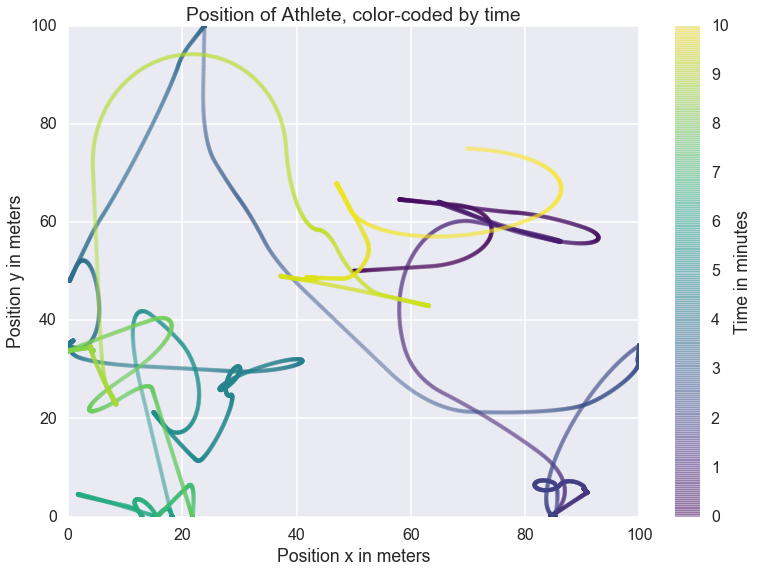

In [13]:
time = np.arange(positions.shape[0]) * (dt/60.)
plt.scatter(positions[:,0], positions[:,1], c = time, alpha = .3, cmap = 'viridis',edgecolors='none')
plt.xlim(0,100)
plt.xlabel('Position x in meters')
plt.ylim(0,100)
plt.ylabel('Position y in meters')
plt.title('Position of Athlete, color-coded by time')
_=plt.colorbar(label = 'Time in minutes')

In [14]:
# Calculate absolute velocities
vs = np.sqrt((velocities**2).sum(axis = 1))

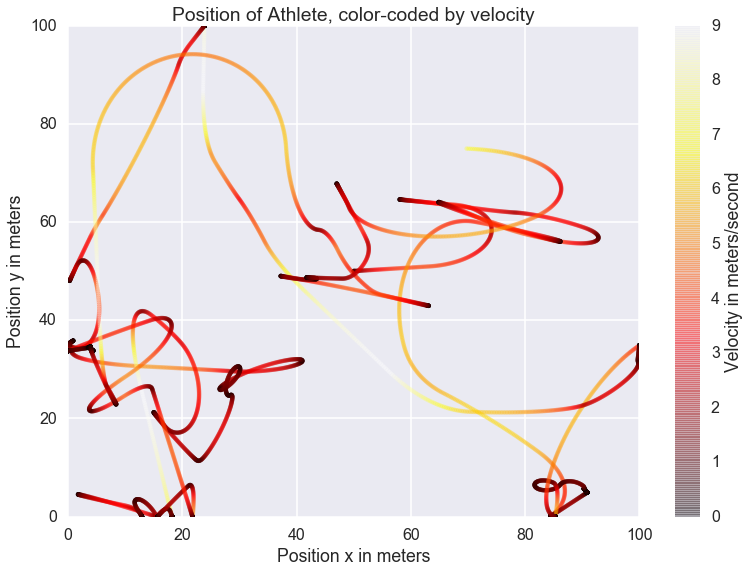

In [15]:
plt.scatter(positions[:,0], positions[:,1], c = vs, alpha = .3, cmap = 'hot',edgecolors='none')
plt.xlim(0,100)
plt.xlabel('Position x in meters')
plt.ylim(0,100)
plt.ylabel('Position y in meters')
plt.colorbar(label = 'Velocity in meters/second')
_=plt.title('Position of Athlete, color-coded by velocity')

In [16]:
# Calculate the covered distance in kilometers as a function of time
delta_pos = np.sqrt(((positions[1:] - positions[:-1])**2).sum(axis = 1))
distance_covered = np.cumsum(delta_pos)/1000.0

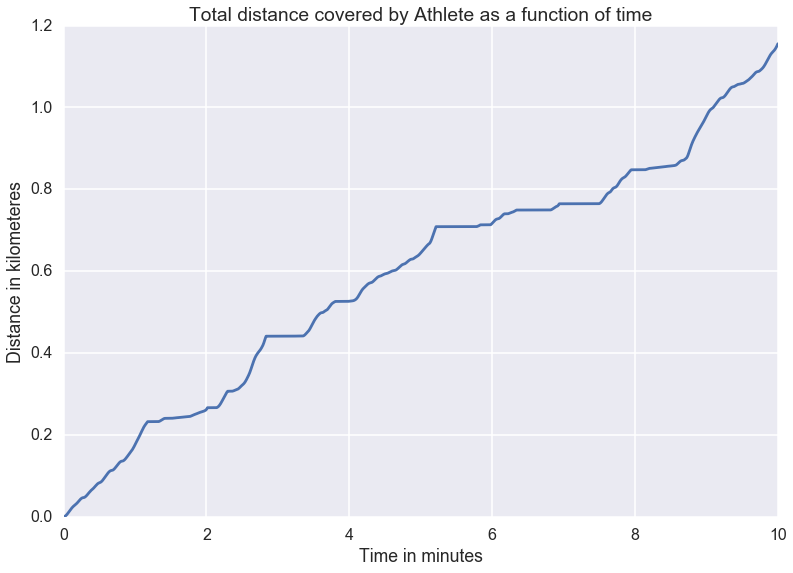

In [17]:
plt.plot(time[1:], distance_covered)
plt.xlabel('Time in minutes')
plt.ylabel('Distance in kilometeres')
_=plt.title('Total distance covered by Athlete as a function of time')